In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt        # Gráficos estáticos
from plotly.subplots import make_subplots  # Subgráficos interactivos con Plotly
import plotly.graph_objects as go      # Gráficos interactivos personalizados con Plotly

import warnings
warnings.filterwarnings('ignore')  # Oculta mensajes de advertencia durante la ejecución


In [54]:
#carga de informacion 
df = pd.read_csv('../resources/CarSales-car_data.csv')

In [55]:
df.head()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body_Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [56]:
df.tail()

,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body_Style,Phone,Dealer_Region
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin
23905,C_CND_023906,12/31/2023,Donovan,Male,1225000,Pars Auto Sales,Lexus,ES300,DoubleÂ Overhead Camshaft,Auto,Pale White,27500,38701-8047,Hardtop,7020564,Middletown


In [57]:
df.shape

(23906, 16)

In [58]:
df.columns

Index(['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price', 'Dealer_No', 'Body_Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [59]:
df.dtypes

Car_id           object
Date             object
Customer_Name    object
Gender           object
Annual_Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price             int64
Dealer_No        object
Body_Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [60]:
df.describe()

,Annual_Income,Price,Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [61]:
df.nunique()

Car_id           23906
Date               612
Customer_Name     3021
Gender               2
Annual_Income     2508
Dealer_Name         28
Company             30
Model              154
Engine               2
Transmission         2
Color                3
Price              870
Dealer_No            7
Body_Style           5
Phone            23804
Dealer_Region        7
dtype: int64

In [62]:
df.isnull().sum()

Car_id           0
Date             0
Customer_Name    1
Gender           0
Annual_Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price            0
Dealer_No        0
Body_Style       0
Phone            0
Dealer_Region    0
dtype: int64

In [63]:
for index, row in df.iterrows():
    if pd.isna(row['Customer_Name']):
        print(f"Fila {index}: {row['Car_id']}")
#Verifico que index es la del dato vacio pero al ser un dato no que no afecta la estadistica no lo manipulo

Fila 7564: C_CND_007565


In [64]:
#Verificacion de Datos duplicados
#para mantener integridad del df original generamos uno nuevo para eliminar la informacion duplicada
df1=df
duplicados=df1.duplicated().sum()
print(f"Cantidad de duplicados: {duplicados}")
if duplicados>0 :
    df1 = df1.drop_duplicates()

Cantidad de duplicados: 0


In [65]:
df1.describe()

,Annual_Income,Price,Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [66]:
#cambio de tipos de datos
df1['Phone'] = df1['Phone'].astype('category')
df1['Customer_Name'] = df1['Customer_Name'].astype('category')
df1['Gender'] = df1['Gender'].astype('category')
df1['Engine'] = df1['Engine'].astype('category')
df1['Dealer_Name'] = df1['Dealer_Name'].astype('category')
df1['Company'] = df1['Company'].astype('category')
df1['Model'] = df1['Model'].astype('category')
df1['Transmission'] = df1['Transmission'].astype('category')
df1['Color'] = df1['Color'].astype('category')
df1['Body_Style'] = df1['Body_Style'].astype('category')
df1['Dealer_Region'] = df1['Dealer_Region'].astype('category')

df1['Car_id'] = df1['Car_id'].astype('category')
df1['Date'] = pd.to_datetime(df1['Date'])
    #.dt.strftime('%d/%m/%Y')
df1['Dealer_No'] = df1['Dealer_No'].astype('category')

df.dtypes

Car_id                 category
Date             datetime64[ns]
Customer_Name          category
Gender                 category
Annual_Income             int64
Dealer_Name            category
Company                category
Model                  category
Engine                 category
Transmission           category
Color                  category
Price                     int64
Dealer_No              category
Body_Style             category
Phone                  category
Dealer_Region          category
dtype: object

#agregar columna para valores necesarios para el analizar info

#Funcion de asigancion de valores
#1 --> Male
#2 -->Female
#3 --> other
def clasificar_genero(genero):
    if genero == "Male":
        return 1
    elif genero == "Female":
        return 2
    else:
        return 3

df["Gender_corelative"] = df["Gender"].apply(clasificar_genero)

df.describe()


In [67]:
conteo_Body_Style = df1['Body_Style'].value_counts()
print(conteo_Body_Style)


Body_Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


In [68]:

x_bodyStyle = conteo_Body_Style.index.tolist()
y_bodyStyle = conteo_Body_Style.values

print(x_bodyStyle)
print(y_bodyStyle)

['SUV', 'Hatchback', 'Sedan', 'Passenger', 'Hardtop']
[6374 6128 4488 3945 2971]


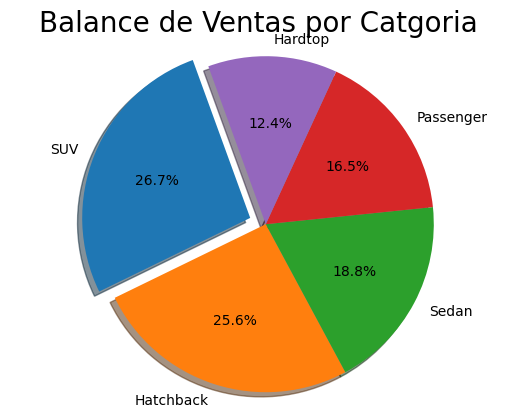

In [69]:


explode = (0.1, 0,0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y_bodyStyle, explode=explode, labels=x_bodyStyle, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal') 
plt.title('Balance de Ventas por Catgoria',fontsize=20)
plt.show()

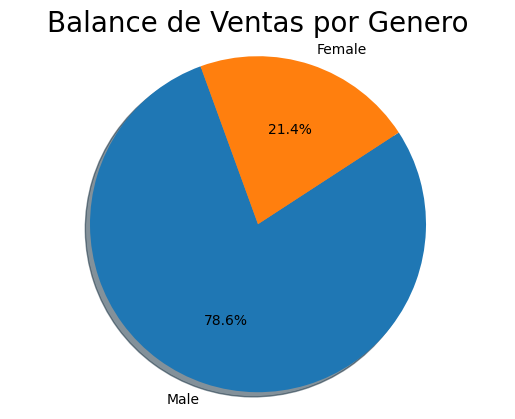

In [70]:
conteo_Gender = df1['Gender'].value_counts()
x_Gender = conteo_Gender.index.tolist()
y_Gender = conteo_Gender.values

#explode = (0.1, 0,0,0,0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y_Gender, labels=x_Gender, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal') 
plt.title('Balance de Ventas por Genero',fontsize=20)
plt.show()


Gender
Female    144440271
Male      527085194
Name: Price, dtype: int64


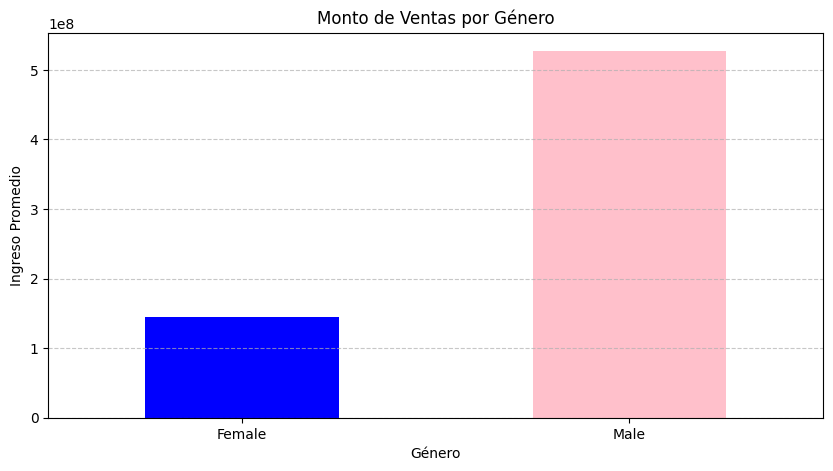

In [74]:
#Calculo total de ingreso
ingresos_por_genero = df1.groupby('Gender')['Price'].sum()
print(ingresos_por_genero)
# Crear el gráfico de barras
plt.figure(figsize=(10,5))
ingresos_por_genero.plot(kind='bar', color=['blue', 'pink'])
plt.title('Monto de Ventas por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Promedio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Gender
Female    28277.265270
Male      28039.429407
Name: Price, dtype: float64


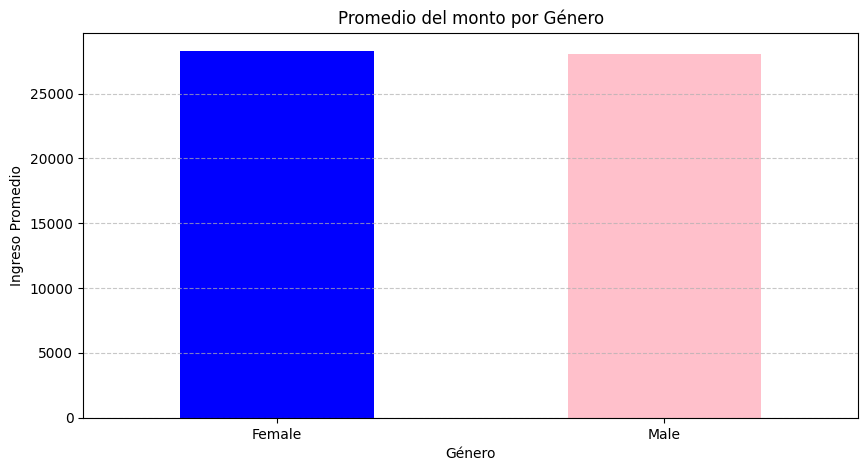

In [75]:
#Calculo de la media
ingresos_por_genero = df1.groupby('Gender')['Price'].mean()
print(ingresos_por_genero)
# Crear el gráfico de barras
plt.figure(figsize=(10,5))
ingresos_por_genero.plot(kind='bar', color=['blue', 'pink'])
plt.title('Promedio del monto por Género')
plt.xlabel('Género')
plt.ylabel('Ingreso Promedio')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [76]:
df2=df1
#df2['Mes'] = df['Date'].dt.month

In [77]:

unwanted=['Car_id', 'Date', 'Customer_Name', 'Gender',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Dealer_No', 'Body_Style', 'Phone', 'Dealer_Region']
df2.drop(labels=unwanted,axis=1,inplace=True)
df.dtypes


Annual_Income    int64
Price            int64
dtype: object

In [78]:
df2.corr()

,Annual_Income,Price
Annual_Income,1.000000,0.012065
Price,0.012065,1.000000


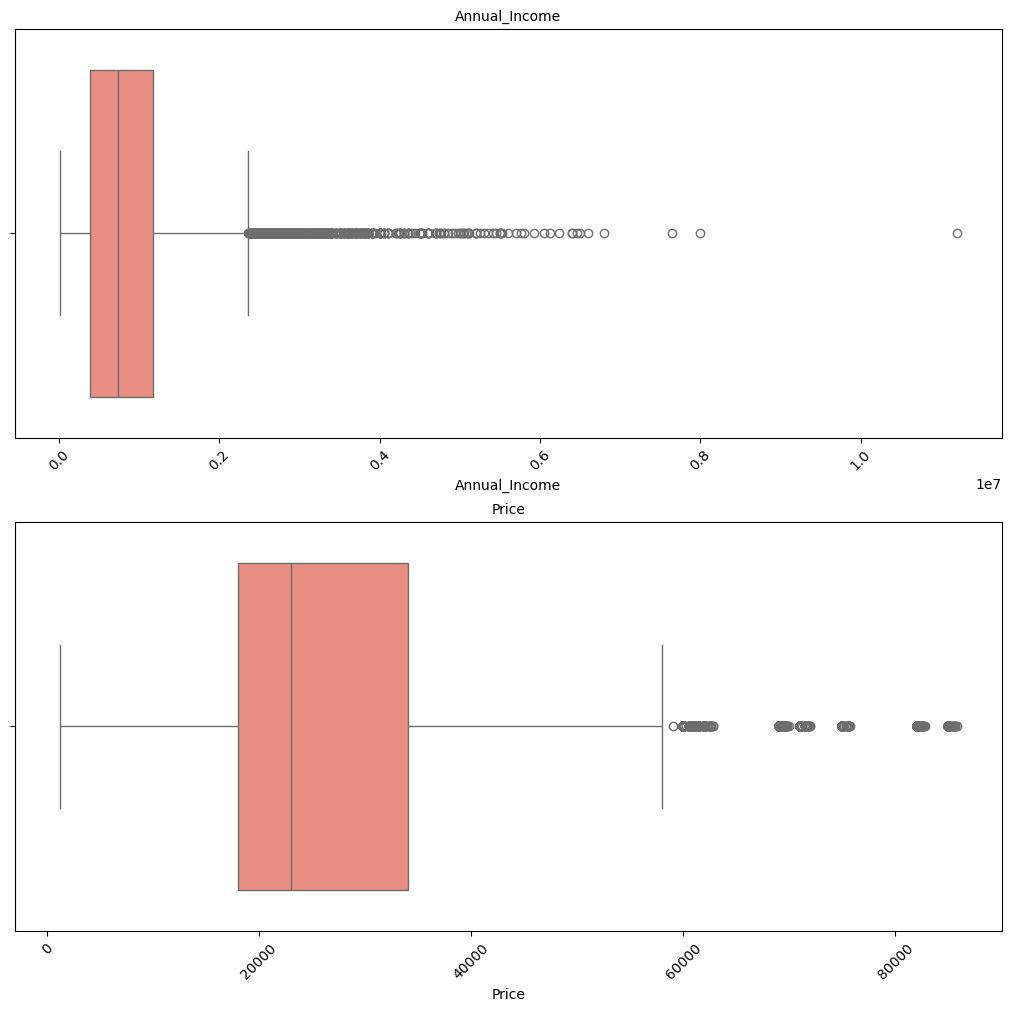

In [88]:
numerical_col = df1.select_dtypes(include='number').columns
len(numerical_col)

# Ajustar tamaño total de la figura
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), constrained_layout=True)

# Ajustar márgenes y espaciado interno
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.5)

# Dibujar boxplots y mejorar visibilidad
for ax, column in zip(axes.flatten(), numerical_col):
    sns.boxplot(data=df1, x=column, ax=ax, color='salmon')
    ax.set_title(column, fontsize=10)
    ax.tick_params(axis='x', labelrotation=45)  # Rotar etiquetas si fueran categóricas

# Mostrar la figura
plt.show()

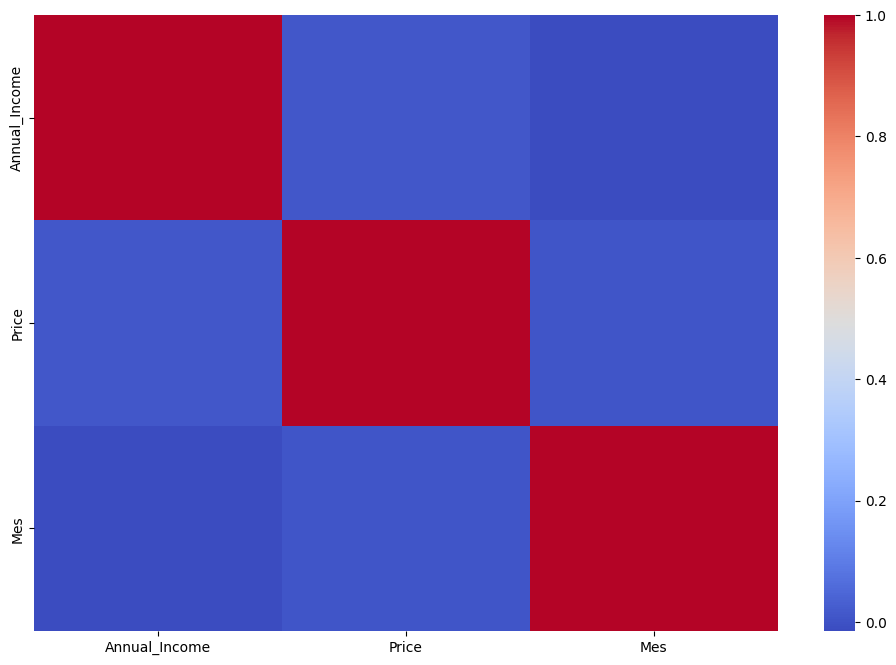

In [176]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [177]:
df.max(numeric_only=True)

Annual_Income    11200000
Price               85800
Mes                    12
dtype: int64